<br><br><br><br><br>

# The Scientific Python Ecosystem

<br><br><br><br><br>

<img src="img/shells-1.png" width="70%"><i>(Stolen from Jake Vanderplas.)</i>

<img src="img/shells-2.png" width="70%"><i>(Stolen from Jake Vanderplas.)</i>

<img src="img/shells-3.png" width="70%"><i>(Stolen from Jake Vanderplas.)</i>

<img src="img/shells-4.png" width="70%"><i>(Stolen from Jake Vanderplas.)</i>

<img src="img/shells-5.png" width="70%"><i>(Stolen from Jake Vanderplas.)</i>

<br><br>

<p style="font-size: 100px"><img src="img/scipy-logo.png" width="45%" style="vertical-align: middle"> = <img src="img/numerical-recipes.jpg" width="25%" style="vertical-align: middle"></p>

<br><br>

<center><img src="img/scipy-docs.png" width="65%"></center>

In [2]:
import uproot, numpy, matplotlib.pyplot
masses = uproot.open("http://scikit-hep.org/uproot/examples/Zmumu.root")["events"].array("M")

y, edges = numpy.histogram(masses, bins=100)
yerr = numpy.sqrt(y)

# the middle of each bin
x = (edges[1:] + edges[:-1])/2

matplotlib.pyplot.errorbar(x, y, yerr, fmt="o", capsize=3);

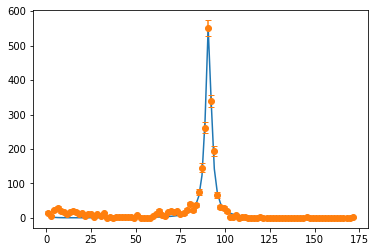

In [3]:
import scipy.stats      # for functions like "cauchy"
import scipy.optimize   # for optimizations like "curve_fit"

f = lambda x, a, b, c, d: a*scipy.stats.cauchy.pdf(x, b, c) + d/x**2

# fit f to x, y, yerr, excluding points where y and yerr are zero
parameters, errors = scipy.optimize.curve_fit(f, x[y > 0], y[y > 0], sigma=yerr[y > 0])

matplotlib.pyplot.plot(x, f(x, *parameters))
matplotlib.pyplot.errorbar(x, y, yerr, fmt="o", capsize=3);

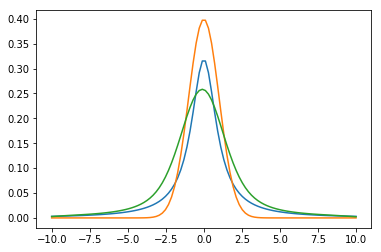

In [4]:
xs = numpy.linspace(-10, 10, 100)

# Exercise: search through the SciPy docs and figure out how to convolve two functions.
lorentzian = scipy.stats.cauchy.pdf(xs)
gaussian   = scipy.stats.norm.pdf(xs)
voigtian   = ???

matplotlib.pyplot.plot(xs, lorentzian);
matplotlib.pyplot.plot(xs, gaussian);
matplotlib.pyplot.plot(xs, voigtian);

<img src="img/pyminuit.png" width="100%">

<center><img src="img/iminuit.png" width="90%"></center>

In [5]:
import iminuit

def chi2(a, b, c, d):
    return ((y[y > 0] - f(x[y > 0], a, b, c, d))**2 / yerr[y > 0]**2).sum()

m = iminuit.Minuit(chi2, errordef=1,
                   a=3350, b=91, c=2, d=30,
                   error_a=100, error_b=1, error_c=0.1, error_d=10)
m.migrad()
m.hesse()
m.minos()
m.draw_mncontour("b", "c", nsigma=4);

FCN = 397.0363642436758 
 TOTAL NCALL = 67 
 NCALLS = 67 
 
 
 EDM = 3.391202223771335e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Hesse Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 Fixed? 
 
 
 0 
 a 
 3356.15 
 77.6124 
 
 
 
 
 No 
 
 
 1 
 b 
 90.6938 
 0.0658839 
 
 
 
 
 No 
 
 
 2 
 c 
 1.92315 
 0.0615169 
 
 
 
 
 No 
 
 
 3 
 d 
 29.6471 
 5.82103 
 
 
 
 
 No 
 
 
 
 
\begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Hesse Error & Minos Error- & Minos Error+ & Limit- & Limit+ & Fixed?\\
\hline
0 & a & 3356.15 & 77.6124 & & & & & No\\
\hline
1 & b & 90.6938 & 0.0658839 & & & & & No\\
\hline
2 & c & 1.92315 & 0.0615169 & & & & & No\\
\hline
3 & d & 29.6471 & 5.82103 & & & & & No\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Hesse Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 Fixed? 
 
 
 0 
 a 
 3356.15 
 77.6123 
 
 
 
 
 No 
 
 
 1 
 b 
 90.6938 
 0.0658839 
 
 
 
 
 No 
 
 
 2 
 c 
 1.92315 
 0.0615168 
 
 
 
 
 No 
 
 
 3 
 d 
 29.6471 
 5.82103 
 
 
 
 
 No 
 
 
 
 
\begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Hesse Error & Minos Error- & Minos Error+ & Limit- & Limit+ & Fixed?\\
\hline
0 & a & 3356.15 & 77.6123 & & & & & No\\
\hline
1 & b & 90.6938 & 0.0658839 & & & & & No\\
\hline
2 & c & 1.92315 & 0.0615168 & & & & & No\\
\hline
3 & d & 29.6471 & 5.82103 & & & & & No\\
\hline
\end{tabular}

+ a b c d 
 
 
 a 1.00 0.00 0.07 -0.00 
 
 
 b 0.00 1.00 -0.15 0.00 
 
 
 c 0.07 -0.15 1.00 -0.00 
 
 
 d -0.00 0.00 -0.00 1.00 
 
 
 
 
%\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{a} & \rotatebox{90}{b} & \rotatebox{90}{c} & \rotatebox{90}{d}\\
\hline
a & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{169,244,181} 0.07 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
b & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,233,175} -0.15 & \cellcolor[RGB]{163,254,186} 0.00\\
\hline
c & \cellcolor[RGB]{169,244,181} 0.07 & \cellcolor[RGB]{177,233,175} -0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,253,186} -0.00\\
\hline
d & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

Minos status for a: VALID 
 
 
 Error 
 -77.4295504532829 
 77.8001554690416 
 
 
 Valid 
 True 
 True 
 
 
 At Limit 
 False 
 False 
 
 
 Max FCN 
 False 
 False 
 
 
 New Min 
 False 
 False

Minos status for b: VALID 
 
 
 Error 
 -0.06587118631284385 
 0.06586124828763393 
 
 
 Valid 
 True 
 True 
 
 
 At Limit 
 False 
 False 
 
 
 Max FCN 
 False 
 False 
 
 
 New Min 
 False 
 False

Minos status for c: VALID 
 
 
 Error 
 -0.06025462621148123 
 0.062860939176947 
 
 
 Valid 
 True 
 True 
 
 
 At Limit 
 False 
 False 
 
 
 Max FCN 
 False 
 False 
 
 
 New Min 
 False 
 False

Minos status for d: VALID 
 
 
 Error 
 -5.823472318104637 
 5.818789863607575 
 
 
 Valid 
 True 
 True 
 
 
 At Limit 
 False 
 False 
 
 
 Max FCN 
 False 
 False 
 
 
 New Min 
 False 
 False

<br><br><br>

<center><img src="img/scikit-learn-logo.png" width="40%"></center>

<br><br><br>

<img src="img/scikit-learn-estimators.png" width="95%">

In [6]:
import sklearn.datasets
X1, y1 = sklearn.datasets.make_gaussian_quantiles(
    cov=2.0, n_samples=800, n_features=2, n_classes=2, random_state=1)
X2, y2 = sklearn.datasets.make_gaussian_quantiles(
    mean=(3, 3), cov=1.5, n_samples=1200, n_features=2, n_classes=2, random_state=1)
X = numpy.concatenate((X1, X2))
y = numpy.concatenate((y1, -y2 + 1))

# These points represent a hard classification problem.
matplotlib.pyplot.scatter(X[y == 0, 0], X[y == 0, 1], c="deepskyblue", edgecolor="black");
matplotlib.pyplot.scatter(X[y == 1, 0], X[y == 1, 1], c="orange", edgecolor="black");

In [7]:
import sklearn.ensemble
import sklearn.tree

# Solution? Boosted decision tree!
bdt = sklearn.ensemble.AdaBoostClassifier(
    sklearn.tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200)
bdt.fit(X, y)

print("\n\npredictions:\n", bdt.predict(X))
print("\n\ntruth:\n", y)



predictions:
 [0 1 1 ... 1 1 1]


truth:
 [0 1 1 ... 0 0 1]


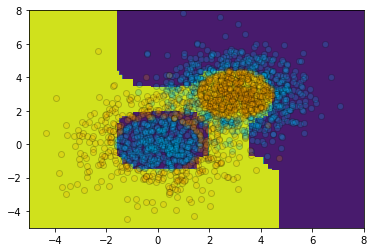

In [8]:
xx, yy = numpy.meshgrid(numpy.arange(-5, 8, 0.02), numpy.arange(-5, 8, 0.02))
Z = bdt.predict(numpy.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# The decision boundary is a close fit to the points.
matplotlib.pyplot.contourf(xx, yy, Z);
matplotlib.pyplot.scatter(X[y == 0, 0], X[y == 0, 1], c="deepskyblue", edgecolor="black", alpha=0.2);
matplotlib.pyplot.scatter(X[y == 1, 0], X[y == 1, 1], c="orange", edgecolor="black", alpha=0.2);
matplotlib.pyplot.xlim(-5, 8);
matplotlib.pyplot.ylim(-5, 8);

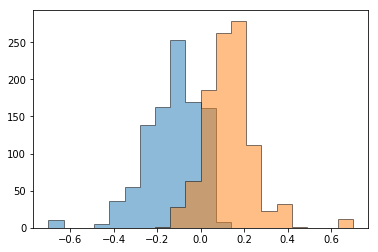

In [9]:
twoclass_output = bdt.decision_function(X)

# Decision scores clearly separate the two populations.
matplotlib.pyplot.hist(twoclass_output[y == 0], bins=20, range=(-0.7, 0.7),
                       alpha=0.5, histtype="stepfilled", edgecolor="black");
matplotlib.pyplot.hist(twoclass_output[y == 1], bins=20, range=(-0.7, 0.7),
                       alpha=0.5, histtype="stepfilled", edgecolor="black");

<br><br><br><br>

<center><img src="img/pytorch-logo.png" width="50%"></center>

<br><br><br><br>

In [10]:
import torch

# Turn the Numpy training dataset into Torch-flavored arrays (relocatable to GPUs)
X2 = torch.from_numpy(X.astype(numpy.float32))
y2 = torch.from_numpy(y.astype(numpy.float32).reshape(-1, 1))

num_hidden = 8                                            # This is the neural network
model = torch.nn.Sequential(
    torch.nn.Linear(X2.shape[1], num_hidden),             # inputs → first hidden layer
    torch.nn.Sigmoid(),                                   # first sigmoid
    torch.nn.Linear(num_hidden, num_hidden),              # first hidden layer → second hidden layer
    torch.nn.Sigmoid(),                                   # second sigmoid
    torch.nn.Linear(num_hidden, y2.shape[1]))             # second hidden layer → outputs

loss_fn = torch.nn.MSELoss(reduction="sum")               # simple loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # optimize with learning rate of 0.01

for i in range(1000):
    y2_pred = model(X2)                                   # compute prediction
    loss = loss_fn(y2_pred, y2)                           # compute prediction - training loss
    optimizer.zero_grad()                                 # reset gradient calculation
    loss.backward()                                       # backpropagation
    optimizer.step()                                      # optimize weights in the network

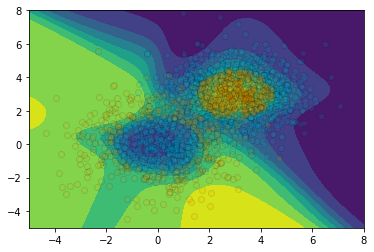

In [11]:
Z2 = model(torch.from_numpy(numpy.c_[xx.ravel(), yy.ravel()].astype(numpy.float32)))
Z2 = Z2.detach().numpy().reshape(xx.shape)
Z2

# Same decision boundary plot as before (not a hard boundary)
matplotlib.pyplot.contourf(xx, yy, Z2);
matplotlib.pyplot.scatter(X[y == 0, 0], X[y == 0, 1], c="deepskyblue", edgecolor="black", alpha=0.1);
matplotlib.pyplot.scatter(X[y == 1, 0], X[y == 1, 1], c="orange", edgecolor="black", alpha=0.1);
matplotlib.pyplot.xlim(-5, 8);
matplotlib.pyplot.ylim(-5, 8);

<br><br><br><br>

**Exercises:**

   1. Change the Sigmoid to a RELU function (what is that?) and see what happens to the decision boundary.
   2. Add another hidden layer and change the number of nodes in each hidden layer.
   3. How would you monitor the convergence of the fit?

<br><br><br><br>

<br><br>

<center><img src="img/sympy-logo.png" width="40%"></center>

<br><br>

In [12]:
import sympy

E, pt = sympy.symbols("E, pt", positive=True)
px, py, pz, eta, phi = sympy.symbols("px, py, pz, eta, phi", real=True)

# Who needs Mathematica?
sympy.solve([
    sympy.Eq(pt, sympy.sqrt(px**2 + py**2)),
    sympy.Eq(eta, sympy.atanh(pz / sympy.sqrt(px**2 + py**2 + pz**2))),
    sympy.Eq(phi, sympy.atan2(py, px))
], px, py, pz)

[(-pt*Abs(cos(phi)), pt*sin(phi), -pt*sinh(eta)),
 (-pt*Abs(cos(phi)), pt*sin(phi), pt*sinh(eta)),
 (pt*Abs(cos(phi)), pt*sin(phi), -pt*sinh(eta)),
 (pt*Abs(cos(phi)), pt*sin(phi), pt*sinh(eta))]

In [13]:
eta = sympy.atanh(pz / sympy.sqrt(px**2 + py**2 + pz**2))

# I most often use it for approximating a function with Taylor series
approximation = sympy.series(eta, pz, 0, 3)
approximation

pz*(-63*px**10/(256*px**10*sqrt(px**2 + py**2) + 1280*px**8*py**2*sqrt(px**2 + py**2) + 2560*px**6*py**4*sqrt(px**2 + py**2) + 2560*px**4*py**6*sqrt(px**2 + py**2) + 1280*px**2*py**8*sqrt(px**2 + py**2) + 256*py**10*sqrt(px**2 + py**2)) - 315*px**8*py**2/(256*px**10*sqrt(px**2 + py**2) + 1280*px**8*py**2*sqrt(px**2 + py**2) + 2560*px**6*py**4*sqrt(px**2 + py**2) + 2560*px**4*py**6*sqrt(px**2 + py**2) + 1280*px**2*py**8*sqrt(px**2 + py**2) + 256*py**10*sqrt(px**2 + py**2)) + 385*px**8/(256*px**8*sqrt(px**2 + py**2) + 1024*px**6*py**2*sqrt(px**2 + py**2) + 1536*px**4*py**4*sqrt(px**2 + py**2) + 1024*px**2*py**6*sqrt(px**2 + py**2) + 256*py**8*sqrt(px**2 + py**2)) - 315*px**6*py**4/(128*px**10*sqrt(px**2 + py**2) + 640*px**8*py**2*sqrt(px**2 + py**2) + 1280*px**6*py**4*sqrt(px**2 + py**2) + 1280*px**4*py**6*sqrt(px**2 + py**2) + 640*px**2*py**8*sqrt(px**2 + py**2) + 128*py**10*sqrt(px**2 + py**2)) + 385*px**6*py**2/(64*px**8*sqrt(px**2 + py**2) + 256*px**6*py**2*sqrt(px**2 + py**2) + 384*

In [14]:
import inspect

# ...and dropping code for the approximation into a numerical calculation
f = sympy.lambdify([px, py, pz], approximation.removeO())
print(inspect.getsource(f))

def _lambdifygenerated(px, py, pz):
    return (pz*(-63*px**10/(256*px**10*sqrt(px**2 + py**2) + 1280*px**8*py**2*sqrt(px**2 + py**2) + 2560*px**6*py**4*sqrt(px**2 + py**2) + 2560*px**4*py**6*sqrt(px**2 + py**2) + 1280*px**2*py**8*sqrt(px**2 + py**2) + 256*py**10*sqrt(px**2 + py**2)) - 315*px**8*py**2/(256*px**10*sqrt(px**2 + py**2) + 1280*px**8*py**2*sqrt(px**2 + py**2) + 2560*px**6*py**4*sqrt(px**2 + py**2) + 2560*px**4*py**6*sqrt(px**2 + py**2) + 1280*px**2*py**8*sqrt(px**2 + py**2) + 256*py**10*sqrt(px**2 + py**2)) + 385*px**8/(256*px**8*sqrt(px**2 + py**2) + 1024*px**6*py**2*sqrt(px**2 + py**2) + 1536*px**4*py**4*sqrt(px**2 + py**2) + 1024*px**2*py**6*sqrt(px**2 + py**2) + 256*py**8*sqrt(px**2 + py**2)) - 315*px**6*py**4/(128*px**10*sqrt(px**2 + py**2) + 640*px**8*py**2*sqrt(px**2 + py**2) + 1280*px**6*py**4*sqrt(px**2 + py**2) + 1280*px**4*py**6*sqrt(px**2 + py**2) + 640*px**2*py**8*sqrt(px**2 + py**2) + 128*py**10*sqrt(px**2 + py**2)) + 385*px**6*py**2/(64*px**8*sqrt(px**2 + py*

<br><br><br><br><br>

# Libraries for faster math

<br><br><br><br><br>

In [15]:
import uproot, numpy, numexpr

arrays = (uproot.open("http://scikit-hep.org/uproot/examples/Zmumu.root")["events"]
                .arrays(["E*", "p*"], namedecode="utf-8"))

for n in arrays:
    exec(f"{n} = numpy.repeat(arrays['{n}'], 10000)")

# The Numpy way: compute a step for all values before moving to the next step
def numpy_calculate(E1, E2, px1, px2, py1, py2, pz1, pz2):
    return numpy.sqrt((E1 + E2)**2 - (px1 + px2)**2 - (py1 + py2)**2 - (pz1 + pz2)**2)

# The NumExpr way: compute a whole expression for each value before moving to the next value
numexpr_calculate = numexpr.NumExpr(
    "sqrt((E1 + E2)**2 - (px1 + px2)**2 - (py1 + py2)**2 - (pz1 + pz2)**2)")

# and do it in parallel (ufunc-like expressions are embarrassingly parallel)
numexpr.set_num_threads(12)

12

In [16]:
%%timeit

masses = numpy_calculate(E1, E2, px1, px2, py1, py2, pz1, pz2)

426 ms ± 10.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
%%timeit

masses = numexpr_calculate.run(E1, E2, px1, px2, py1, py2, pz1, pz2)

71.3 ms ± 941 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
numexpr.disassemble(numexpr_calculate)

[(b'add_ddd', b'r0', b'r1[E1]', b'r2[E2]'),
 (b'mul_ddd', b'r0', b'r0', b'r0'),
 (b'add_ddd', b't9', b'r3[px1]', b'r4[px2]'),
 (b'mul_ddd', b't9', b't9', b't9'),
 (b'sub_ddd', b't9', b'r0', b't9'),
 (b'add_ddd', b'r0', b'r5[py1]', b'r6[py2]'),
 (b'mul_ddd', b't10', b'r0', b'r0'),
 (b'sub_ddd', b'r0', b't9', b't10'),
 (b'add_ddd', b't9', b'r7[pz1]', b'r8[pz2]'),
 (b'mul_ddd', b't9', b't9', b't9'),
 (b'sub_ddd', b't10', b'r0', b't9'),
 (b'sqrt_dd', b'r0', b't10', None)]

In [19]:
import formulate

# Convert ROOT's TTree::Draw expressions to and from NumExpr

(formulate.from_root(
    "TMath::Sqrt((E1 + E2)**2 - (px1 + px2)**2 - (py1 + py2)**2 - (pz1 + pz2)**2)")
          .to_numexpr())

'sqrt((((E1 + E2) ** 2) - ((px1 + px2) ** 2) - ((py1 + py2) ** 2) - ((pz1 + pz2) ** 2)))'

<br><br><br>

<center><img src="img/numba-logo.png" width="30%"></center>

<br><br><br>

In [20]:
import numba
import math

# The Numba way: compile Python functions as though they were C code
@numba.jit
def numba_calculate(E1, E2, px1, px2, py1, py2, pz1, pz2):
    out = numpy.empty(len(E1))
    for i in range(len(E1)):
        out[i] = math.sqrt(
            (E1[i] + E2[i])**2 - (px1[i] + px2[i])**2 - (py1[i] + py2[i])**2 - (pz1[i] + pz2[i])**2)
    return out

masses = numba_calculate(E1, E2, px1, px2, py1, py2, pz1, pz2)
masses

array([82.46269156, 82.46269156, 82.46269156, ..., 96.65672765,
       96.65672765, 96.65672765])

In [21]:
%%timeit

masses = numba_calculate(E1, E2, px1, px2, py1, py2, pz1, pz2)

120 ms ± 1.65 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [22]:
# High-performance tricks:
# 
#     range → prange is like OpenMP's parallel for (enabled by parallel=True)
#     fastmath sacrfices accuracy for speed in transcendental functions

@numba.jit(parallel=True, fastmath=True)
def numba_calculate2(E1, E2, px1, px2, py1, py2, pz1, pz2):
    out = numpy.empty(len(E1))
    for i in numba.prange(len(E1)):
        out[i] = math.sqrt(
            (E1[i] + E2[i])**2 - (px1[i] + px2[i])**2 - (py1[i] + py2[i])**2 - (pz1[i] + pz2[i])**2)
    return out

masses = numba_calculate2(E1, E2, px1, px2, py1, py2, pz1, pz2)
masses

array([82.46269156, 82.46269156, 82.46269156, ..., 96.65672765,
       96.65672765, 96.65672765])

In [23]:
%%timeit

masses = numba_calculate2(E1, E2, px1, px2, py1, py2, pz1, pz2)

80.8 ms ± 957 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [24]:
# We can make our own ufuncs:
# 
#     define f(A[i], B[i]) → C[i] to get f(A, B) → C

@numba.vectorize
def numba_calculate_ufunc(E1, E2, px1, px2, py1, py2, pz1, pz2):
    return math.sqrt((E1 + E2)**2 - (px1 + px2)**2 - (py1 + py2)**2 - (pz1 + pz2)**2)

masses = numba_calculate_ufunc(E1, E2, px1, px2, py1, py2, pz1, pz2)
masses

array([82.46269156, 82.46269156, 82.46269156, ..., 96.65672765,
       96.65672765, 96.65672765])

In [25]:
%%timeit

masses = numba_calculate_ufunc(E1, E2, px1, px2, py1, py2, pz1, pz2)

116 ms ± 2.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [26]:
# And we can compile Python code that runs on a GPU!
import numba.cuda

@numba.cuda.jit
def numba_calculate_cuda(E1, E2, px1, px2, py1, py2, pz1, pz2, out):
    i = numba.cuda.grid(1)
    if i < len(out):
        out[i] = math.sqrt(
            (E1[i] + E2[i])**2 - (px1[i] + px2[i])**2 - (py1[i] + py2[i])**2 - (pz1[i] + pz2[i])**2)

# Although you have to set up some GPU details...
out_gpu = numba.cuda.device_array(len(E1), dtype=numpy.float64)
for n in "E1", "E2", "px1", "px2", "py1", "py2", "pz1", "pz2":
    exec(f"{n}_gpu = numba.cuda.to_device({n})")

griddim = math.ceil(len(E1) / 1024)
blockdim = 1024
numba_calculate_cuda[griddim, blockdim](
    E1_gpu, E2_gpu, px1_gpu, px2_gpu, py1_gpu, py2_gpu, pz1_gpu, pz2_gpu, out_gpu)

out_gpu.copy_to_host()

array([82.46269156, 82.46269156, 82.46269156, ..., 96.65672765,
       96.65672765, 96.65672765])

In [27]:
%%timeit

numba_calculate_cuda[griddim, blockdim](
    E1_gpu, E2_gpu, px1_gpu, px2_gpu, py1_gpu, py2_gpu, pz1_gpu, pz2_gpu, out_gpu)

10.7 ms ± 14 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


<br><br><br>

<center><img src="img/cupy-logo.png" width="25%"></center>

<br><br><br>

In [31]:
import cupy

for n in "E1", "E2", "px1", "px2", "py1", "py2", "pz1", "pz2":
    exec(f"{n}_gpu = cupy.array({n})")

# The CuPy way: just like Numpy, but on the GPU
def cupy_calculate(E1, E2, px1, px2, py1, py2, pz1, pz2):
    return cupy.sqrt((E1 + E2)**2 - (px1 + px2)**2 - (py1 + py2)**2 - (pz1 + pz2)**2)

masses = cupy_calculate(E1_gpu, E2_gpu, px1_gpu, px2_gpu, py1_gpu, py2_gpu, pz1_gpu, pz2_gpu)
masses

array([82.46269156, 82.46269156, 82.46269156, ..., 96.65672765,
       96.65672765, 96.65672765])

In [32]:
%%timeit

masses = cupy_calculate(E1_gpu, E2_gpu, px1_gpu, px2_gpu, py1_gpu, py2_gpu, pz1_gpu, pz2_gpu)

135 ms ± 508 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<br><br><br>

<center><img src="img/dask-logo.png" width="25%"></center>

<br><br><br>

In [47]:
# The Dask way: accumulate a graph of steps in the calculation to parallelize (possibly remote)

import dask.array

for n in "E1", "E2", "px1", "px2", "py1", "py2", "pz1", "pz2":
    exec(f"{n}_dask = dask.array.from_array({n}, chunks=len(E1)/12)")

def dask_calculate(E1, E2, px1, px2, py1, py2, pz1, pz2):
    return numpy.sqrt((E1 + E2)**2 - (px1 + px2)**2 - (py1 + py2)**2 - (pz1 + pz2)**2)

masses = dask_calculate(E1_dask, E2_dask, px1_dask, px2_dask, py1_dask, py2_dask, pz1_dask, pz2_dask)
masses

dask.array<sqrt, shape=(23040000,), dtype=float64, chunksize=(1920000,)>

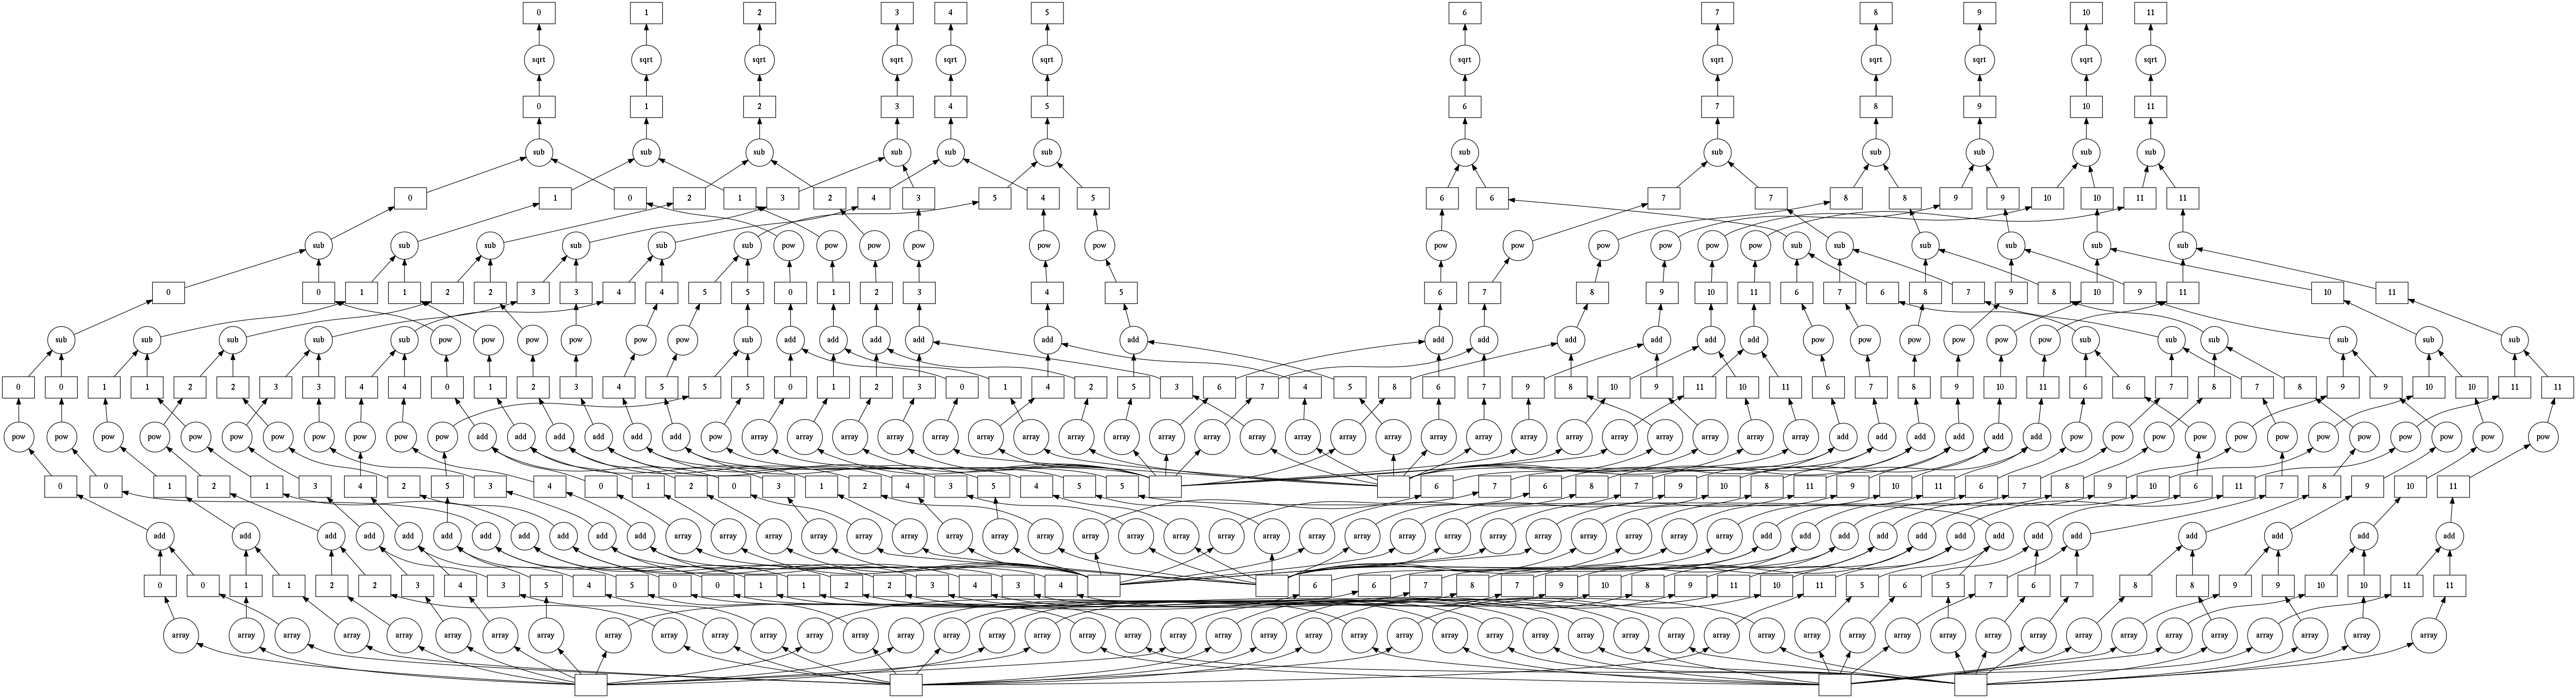

In [48]:
masses.visualize()

In [49]:
%%timeit

masses.compute()

376 ms ± 3.19 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<br><br><br>

<center><img src="img/cython-logo.png" width="25%"></center>

<br><br><br>

In [50]:
%load_ext Cython

# Cython is a language that mixes C++ and Python. Can it help?

In [59]:
%%cython --cplus -c-O3 -a
import cython, numpy
cimport numpy
from libc.math cimport sqrt

@cython.boundscheck(False)
@cython.wraparound(False)
def cython_calculate(E1, E2, px1, px2, py1, py2, pz1, pz2):
    out = numpy.empty(len(E1))
    cdef numpy.ndarray[numpy.float64_t, ndim=1, mode="c"] out_raw = out
    cdef numpy.ndarray[numpy.float64_t, ndim=1, mode="c"] E1_raw = E1
    cdef numpy.ndarray[numpy.float64_t, ndim=1, mode="c"] E2_raw = E2
    cdef numpy.ndarray[numpy.float64_t, ndim=1, mode="c"] px1_raw = px1
    cdef numpy.ndarray[numpy.float64_t, ndim=1, mode="c"] px2_raw = px2
    cdef numpy.ndarray[numpy.float64_t, ndim=1, mode="c"] py1_raw = py1
    cdef numpy.ndarray[numpy.float64_t, ndim=1, mode="c"] py2_raw = py2
    cdef numpy.ndarray[numpy.float64_t, ndim=1, mode="c"] pz1_raw = pz1
    cdef numpy.ndarray[numpy.float64_t, ndim=1, mode="c"] pz2_raw = pz2
    cdef int length = len(E1)
    for i in range(length):
        out_raw[i] = sqrt((E1_raw[i] + E2_raw[i])**2 - (px1_raw[i] + px2_raw[i])**2 -
                          (py1_raw[i] + py2_raw[i])**2 - (pz1_raw[i] + pz2_raw[i])**2)
    return out

In [61]:
%%timeit

masses = cython_calculate(E1, E2, px1, px2, py1, py2, pz1, pz2)

135 ms ± 3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<br><br><br>

<center><img src="img/pybind11-logo.png" width="40%"></center>

<br><br><br>

In [70]:
%%writefile cpp_calculate.cpp
#include <cmath>
#include <pybind11/pybind11.h>
#include <pybind11/numpy.h>
namespace py = pybind11;
double sqr(double x) { return x*x; }
void calculate(py::array_t<double> E1, py::array_t<double> E2,
               py::array_t<double> px1, py::array_t<double> px2,
               py::array_t<double> py1, py::array_t<double> py2,
               py::array_t<double> pz1, py::array_t<double> pz2,
               py::array_t<double> out) {
    py::buffer_info E1_info = E1.request();
    size_t length = E1_info.size;
    auto E1_raw = static_cast<double*>(E1.request().ptr);
    auto E2_raw = static_cast<double*>(E2.request().ptr);
    auto px1_raw = static_cast<double*>(px1.request().ptr);
    auto px2_raw = static_cast<double*>(px2.request().ptr);
    auto py1_raw = static_cast<double*>(py1.request().ptr);
    auto py2_raw = static_cast<double*>(py2.request().ptr);
    auto pz1_raw = static_cast<double*>(pz1.request().ptr);
    auto pz2_raw = static_cast<double*>(pz2.request().ptr);
    auto out_raw = static_cast<double*>(out.request().ptr);
    for (size_t i = 0;  i < length;  i++) {
        out_raw[i] = sqrt(sqr(E1_raw[i] + E2_raw[i]) - sqr(px1_raw[i] + px2_raw[i]) -
                          sqr(py1_raw[i] + py2_raw[i]) - sqr(pz1_raw[i] + pz2_raw[i]));
    }
}
PYBIND11_MODULE(cpp_calculate, m) {
    m.def("calculate", &calculate, "");
}

Overwriting cpp_calculate.cpp


In [71]:
%%bash

# Compile it as a Python extension module

c++ -Wall -shared -std=c++11 -fPIC -O3 \
    `python -m pybind11 --includes` cpp_calculate.cpp \
    -o cpp_calculate`python3-config --extension-suffix`

In [74]:
import cpp_calculate

masses = numpy.empty(len(E1), dtype=numpy.float64)
cpp_calculate.calculate(E1, E2, px1, px2, py1, py2, pz1, pz2, masses)
masses

array([82.46269156, 82.46269156, 82.46269156, ..., 96.65672765,
       96.65672765, 96.65672765])

In [75]:
%%timeit

cpp_calculate.calculate(E1, E2, px1, px2, py1, py2, pz1, pz2, masses)

195 ms ± 2.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Summary

| Method         | Capabilities                  | Time (ms) | Parallel? | Speedup |
|:--------------:|:-----------------------------:|:---------:|:---------:|:-------:|
| Numpy          | array-at-a-time               | 426       | no        | 1×      |
| NumExpr        | single-pass ufunc             |  71.3     | yes       |         |
| Numba          | numerical for/if              | 120       | no        | |
| Numba + tricks | numerical for/if              |  80.8     | yes       | |
| Numba + CUDA   | numerical for/if              |  10.7     | (GPU)     | |
| CuPy           | array-at-a-time               | 135       | (GPU)     | |
| Dask           | array-at-a-time as tasks      | 376       | yes       | |
| Cython         | numerical for/if (hybrid C++) | 135       | no        | |
| pybind11       | numerical for/if (pure C++)   | 195       | no        | |


<br><br><br><br><br>

# Libraries specifically for particle physics

<br><br><br><br><br>

In [190]:
import numpythia
import numpythia.testcmnd
import pandas

pythia = numpythia.Pythia(numpythia.testcmnd.get_cmnd("w"), random_state=1)

events = list(pythia(events=1))    # pythia is a generator; evaluate it
pandas.DataFrame(events[0].all())  # event.all(SELECTION) returns a Numpy record array

E            px            py           pz            pT  \
0    6500.000000  0.000000e+00  0.000000e+00  6499.999932  0.000000e+00   
1     156.337354 -1.603964e+00  1.789967e+00   156.318878  2.403474e+00   
2    3157.193528  1.632030e-01 -1.049595e+00  3157.193255  1.062208e+00   
3    3186.477199  1.440761e+00 -7.403724e-01  3186.476770  1.619859e+00   
4     156.328011  0.000000e+00  2.220446e-16   156.328011  2.220446e-16   
5    3157.193528  1.632030e-01 -1.049595e+00  3157.193255  1.062208e+00   
6    3186.477199  1.440761e+00 -7.403724e-01  3186.476770  1.619859e+00   
7     151.160792  0.000000e+00  1.110223e-16   151.160792  1.110223e-16   
8     132.235959  3.330669e-14 -7.549517e-14   132.235959  8.251579e-14   
9      18.966263 -1.438213e+00  1.221482e+00    18.872166  1.886922e+00   
10    129.079322  1.665335e-14 -3.774758e-14   129.079322  4.125790e-14   
11    129.079322  8.881784e-16  0.000000e+00   129.079322  8.881784e-16   
12     80.761642  3.552714e-14  7.105427e-15    80.761642  3.623071e-14   
13     50.773495  8.705005e+00 -2.136256e+01    45.230650  2.306808e+01   
14     50.807348  8.710641e+00 -2.137533e+01    45.261536  2.308203e+01   
15     13.604880  3.594938e+00 -7.168036e+00    10.990379  8.018998e+00   
16     40.359105  5.115703e+00 -1.420729e+01    37.427795  1.510025e+01   
17     40.456108  5.538712e+00 -1.456656e+01    37.334097  1.558403e+01   
18      3.251627  7.572504e-01 -8.581014e-01     3.002218  1.144450e+00   
19     43.935302  6.591936e+00 -1.655262e+01    40.157415  1.781692e+01   
20      3.242875  7.253165e-01 -8.221281e-01     3.010691  1.096348e+00   
21      3.242875  7.253165e-01 -8.221281e-01     3.010691  1.096348e+00   
22      2.346952 -8.393021e-02 -5.233160e-01     2.231516  5.300037e-01   
23      5.017068  7.260278e-01 -2.283182e-01     4.957040  7.610818e-01   
24     11.570857 -5.481886e-01  5.102216e-02    11.530791  5.505579e-01   
25     56.187180  9.686375e-01 -1.699006e-01    56.178411  9.834251e-01   
26     47.574596  2.589860e-02  4.131424e-02    47.574366  4.876068e-02   
27     82.595915 -4.117562e-01  9.883136e-02    82.593012  4.234510e-01   
28     56.017883 -4.257959e-01 -1.564910e-01    56.013836  4.536426e-01   
29    894.731258  5.500858e-01 -4.439534e-01   894.730841  7.068869e-01   
..           ...           ...           ...          ...           ...   
404    14.070199  6.235642e+00  9.857060e+00    -7.812991  1.166383e+01   
405     3.601545  1.636962e+00  2.357061e+00    -2.171696  2.869735e+00   
406     1.011955  3.654647e-01  5.795201e-01    -0.554103  6.851336e-01   
407     1.041324  3.632195e-01  9.422014e-01    -0.212613  1.009788e+00   
408     4.816409  9.318120e-01  4.647537e+00    -0.697281  4.740029e+00   
409     1.483839  2.430691e-01  1.347858e+00    -0.554757  1.369600e+00   
410     2.673447  4.325854e-01  2.613896e+00    -0.329026  2.649449e+00   
411     2.544121 -4.430991e-02  2.525988e+00     0.267866  2.526377e+00   
412    15.833678  1.180977e+00  1.553874e+01    -2.498066  1.558355e+01   
413     9.232344  1.325632e+00  9.063685e+00    -1.144123  9.160114e+00   
414     4.324876  1.723379e+00  2.662915e+00    -2.939966  3.171932e+00   
415     0.436046  2.093308e-01  2.447012e-01    -0.294003  3.220218e-01   
416     1.522633  7.767609e-01  8.311318e-01    -1.012064  1.137602e+00   
417     0.969276  5.229614e-01  5.920571e-01    -0.561673  7.899495e-01   
418     1.011955  3.654647e-01  5.795201e-01    -0.554103  6.851336e-01   
419     1.287483  1.745915e-01  1.169569e+00    -0.509155  1.182529e+00   
420     0.196355  6.847765e-02  1.782884e-01    -0.045602  1.909867e-01   
421     1.432836  2.026139e-02  1.429064e+00     0.101910  1.429208e+00   
422     1.111285 -6.457129e-02  1.096924e+00     0.165955  1.098823e+00   
423     8.461579  5.658193e-01  8.337937e+00    -1.228553  8.357114e+00   
424     7.372100  6.151573e-01  7.200799e+00    -1.269513  7.227028e+00   
425     0.710465  1.442658e-01  5.459319

In [191]:
import pyjet

fourvectors = events[0].all()[["E", "px", "py", "pz"]]
for jet in pyjet.cluster(fourvectors, R=1.0, p=-1, ep=True).inclusive_jets():
    print(jet)

PseudoJet(pt=2909.400, eta=-0.778, phi=0.947, mass=1292.519)
PseudoJet(pt=2572.100, eta=-1.973, phi=-2.263, mass=1587.844)
PseudoJet(pt=201.637, eta=1.507, phi=-1.185, mass=58.241)
PseudoJet(pt=49.311, eta=-3.790, phi=2.058, mass=29.501)
PseudoJet(pt=26.513, eta=-4.338, phi=-2.149, mass=89.196)
PseudoJet(pt=16.728, eta=3.088, phi=2.557, mass=11.668)
PseudoJet(pt=14.165, eta=-0.257, phi=-1.441, mass=13.213)
PseudoJet(pt=9.817, eta=0.009, phi=1.695, mass=3.142)
PseudoJet(pt=9.261, eta=-8.374, phi=-2.268, mass=7.053)
PseudoJet(pt=8.531, eta=8.208, phi=-0.457, mass=6.606)
PseudoJet(pt=6.348, eta=-2.649, phi=0.028, mass=2.832)
PseudoJet(pt=3.513, eta=0.227, phi=-3.114, mass=2.351)
PseudoJet(pt=2.876, eta=5.235, phi=2.406, mass=1.891)
PseudoJet(pt=2.590, eta=2.299, phi=0.261, mass=1.236)
PseudoJet(pt=2.579, eta=8.581, phi=-1.500, mass=2.023)
PseudoJet(pt=2.478, eta=-6.952, phi=0.853, mass=-0.000)
PseudoJet(pt=2.208, eta=5.565, phi=-0.178, mass=3.658)
PseudoJet(pt=2.068, eta=-2.560, phi=2.793

In [210]:
import particle
from hepunits.units import cm

import IPython.display

# Find all strange baryons with c*tau > 1 cm
for x in particle.Particle.findall(lambda p: p.pdgid.is_baryon and p.pdgid.has_strange and
                                             p.width > 0 and p.ctau > 1 * cm):
    
    IPython.display.display(IPython.display.Latex("$" + x.latex_name + "$"))
    print(repr(x), end="\n\n")

<IPython.core.display.Latex object>

<Particle: name="Sigma-", pdgid=3112, mass=1197.45 ± 0.03 MeV>



<IPython.core.display.Latex object>

<Particle: name="Sigma~+", pdgid=-3112, mass=1197.45 ± 0.03 MeV>



<IPython.core.display.Latex object>

<Particle: name="Lambda", pdgid=3122, mass=1115.683 ± 0.006 MeV>



<IPython.core.display.Latex object>

<Particle: name="Lambda~", pdgid=-3122, mass=1115.683 ± 0.006 MeV>



<IPython.core.display.Latex object>

<Particle: name="Sigma+", pdgid=3222, mass=1189.37 ± 0.07 MeV>



<IPython.core.display.Latex object>

<Particle: name="Sigma~-", pdgid=-3222, mass=1189.37 ± 0.07 MeV>



<IPython.core.display.Latex object>

<Particle: name="Xi-", pdgid=3312, mass=1321.71 ± 0.07 MeV>



<IPython.core.display.Latex object>

<Particle: name="Xi~+", pdgid=-3312, mass=1321.71 ± 0.07 MeV>



<IPython.core.display.Latex object>

<Particle: name="Xi0", pdgid=3322, mass=1314.86 ± 0.20 MeV>



<IPython.core.display.Latex object>

<Particle: name="Xi~0", pdgid=-3322, mass=1314.86 ± 0.20 MeV>



<IPython.core.display.Latex object>

<Particle: name="Omega-", pdgid=3334, mass=1672.5 ± 0.3 MeV>



<IPython.core.display.Latex object>

<Particle: name="Omega~+", pdgid=-3334, mass=1672.5 ± 0.3 MeV>



<IPython.core.display.Latex object>

<Particle: name="Omega(b)-", pdgid=5332, mass=6046.1 ± 1.7 MeV>



<IPython.core.display.Latex object>

<Particle: name="Omega(b)~+", pdgid=-5332, mass=6046.1 ± 1.7 MeV>



In [222]:
import uncertainties
from uncertainties.umath import *

x = uncertainties.ufloat(1, 0.1)   # 1 ± 0.1

print(f"\n2*x              = {2*x}")

print(f"\nsin(2*x)         = {sin(2*x)}")

print(f"\nsqrt(x) - x**0.5 = {sqrt(x) - x**0.5}")   # correlations!


2*x              = 2.00+/-0.20

sin(2*x)         = 0.91+/-0.08

sqrt(x) - x**0.5 = 0.0+/-0
